#Imports

In [151]:
!pip install sklearn-som

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn_som.som import SOM

In [153]:
import numpy as np

def rbf(x1, x2, gamma = None):
        '''
        RBF: Radial basis function or guassian kernel
        ----------------------------------------------
        :param: x1: NxD transposed feature space
        :param: x2: NxD feature space
        :param: gamma: 1/2(sigma-square)
        :return type: kernel(Gram) matrix
        '''
        if not gamma:
            gamma = 1
        else:
            gamma = gamma
        if x1.ndim == 1 and x2.ndim == 1:
            return np.exp(-gamma * np.linalg.norm(x1 - x2))
        elif (x1.ndim > 1 and x2.ndim == 1) or (x1.ndim == 1 and x2.ndim > 1):
            return np.exp(-gamma * np.linalg.norm(x1 - x2, axis = 1))
        elif x1.ndim > 1 and x2.ndim > 1:
            return np.exp(-gamma * np.linalg.norm(x1[:, np.newaxis] - x2[np.newaxis, :], axis = 2))

class kkMeans:
    def __init__(self, k = None, gamma = None, d = None):
        '''
        :param: k: number of clusters
        :param: kernel
        
        '''
        super().__init__()
        if not gamma:
            gamma = 5
            self.gamma = gamma
        else:
            self.gamma = gamma
        if not d:
            d = 3
            self.d = d
        else:
            self.d = d
        if not k:
            k = 2
            self.k = k
        else:
            self.k = k
        return
    
    def kernelize(self, x1, x2):
        return rbf(x1, x2, gamma = self.gamma)
    
    #compute suqared kernel distance
    def distance(self, kappa):
        self.dist_w = np.zeros(self.k)
        c_k_init = np.ones(kappa.shape[0])
        for ii in range(self.k):
            self.c_k_indices = self.clusters == ii
            self.c_k = np.sum(c_k_init[self.c_k_indices])
            self.c_k_squared = np.square(self.c_k)
            self.kappa_ii = kappa[self.c_k_indices][:, self.c_k_indices]
            self.distance_ii[:, ii] += np.sum(self.kappa_ii)/self.c_k_squared - 2*\
                                    np.sum(kappa[:, self.c_k_indices], axis = 1)/self.c_k
        return self.distance_ii
           
    #fit and return cluster labels
    def fit_predict(self, X, iteration = None, halt = None):
        '''
        :param: X: NxD Feature
        :param: iteration: 100
        :param: tolerance: 1e-3 default
        
        '''
        if not halt:
            halt = 1e-3
            self.halt = halt
        else:
            self.halt = halt
        if not iteration:
            iteration = 100
            self.iteration = iteration
        else:
            self.iteration = iteration
        self.X = X
        N, D = X.shape
        self.distance_ii = np.zeros((N, self.k))
        self.kx = self.kernelize(self.X, self.X)
        self.clusters = np.random.randint(self.k, size = N)
        '''iterate by checking to see if new and previous cluster
        labels are similar. If they are, algorithm converges and halts..
        '''
        for ii in range(self.iteration):
            #compute distance
            self.distance_k = self.distance(self.kx)
            self.prev_clusters = self.clusters
            self.clusters = self.distance_k.argmin(axis=1)
            if 1 - float(np.sum((self.clusters - self.prev_clusters) == 0)) / N < self.halt:
                break
        return self

    def rand_index_score(self, clusters, classes):
        '''Compute the RandIndex
        :param: Clusters: Cluster labels
        :param: classses: Actual class
        :returntype: float
        '''
        from scipy.special import comb
        tp_fp = comb(np.bincount(clusters), 2).sum()
        tp_fn = comb(np.bincount(classes), 2).sum()
        A = np.c_[(clusters, classes)]
        tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
                 for i in set(clusters))
        fp = tp_fp - tp
        fn = tp_fn - tp
        tn = comb(len(A), 2) - tp - fp - fn
        self.randindex = (tp + tn) / (tp + fp + fn + tn)
        return self.randindex

In [154]:
data_2d_10c = pd.read_csv("./2d-10c.dat", header=None, sep=' ')[3:]
data_iris = pd.read_csv("./iris.csv", header=None)
data_long = pd.read_csv("./long.data", header=None, sep=' ')
data_order2_3clust = pd.read_csv("./order2-3clust.csv", header=None)
data_smile = pd.read_csv("./smile.csv", header=None)
data_square = pd.read_csv("./square.data", header=None, sep=' ')

data_2d_10c_X = data_2d_10c.to_numpy()[:, :-1]
data_2d_10c_y = data_2d_10c.to_numpy()[:, -1]
data_iris_X = data_iris.to_numpy()[:, :-1]
data_iris_y = data_iris.to_numpy()[:, -1]
data_long_X = data_long.to_numpy()[:, :-1]
data_long_y = data_long.to_numpy()[:, -1]
data_order2_3clust_X = data_order2_3clust.to_numpy()[:, :-1]
data_order2_3clust_y = data_order2_3clust.to_numpy()[:, -1]
data_smile_X = data_smile.to_numpy()[:, :-1]
data_smile_y = data_smile.to_numpy()[:, -1]
data_square_X = data_square.to_numpy()[:, :-1]
data_square_y = data_square.to_numpy()[:, -1]

#Dataset 2d-10c

In [123]:
data_X = data_2d_10c_X
data_y = data_2d_10c_y
n_components = 10
n_dimensions = 2

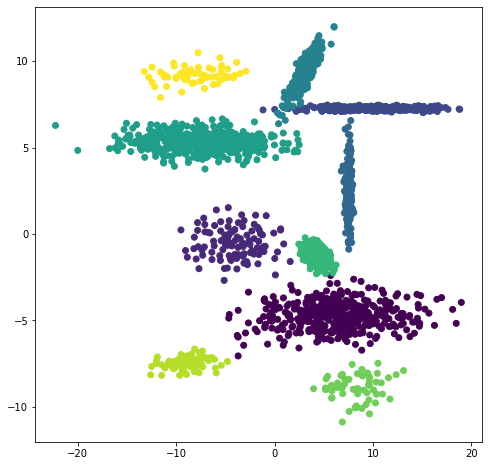

In [124]:
plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y)
plt.show()

##Single linkage

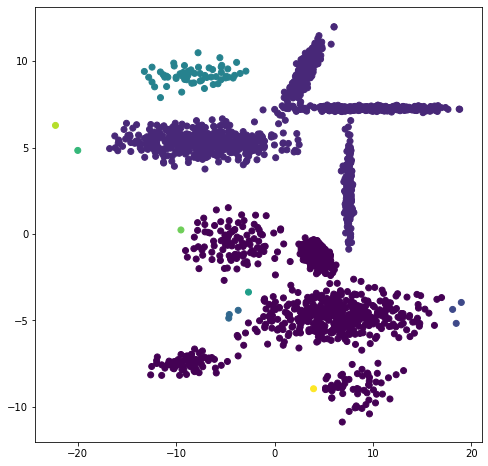

Adjusted rand index:  0.3048393968322609


In [125]:
clustering = AgglomerativeClustering(linkage='single', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Complete linkage

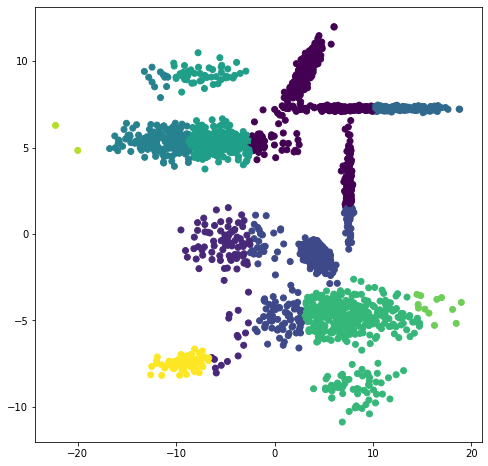

Adjusted rand index:  0.5178917767931812


In [126]:
clustering = AgglomerativeClustering(linkage='complete', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Average linkage

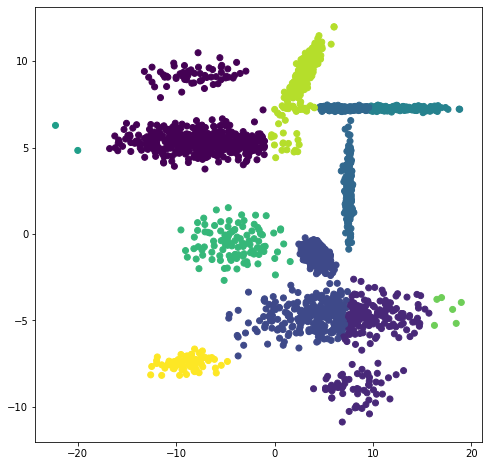

Adjusted rand index:  0.6618781876701492


In [127]:
clustering = AgglomerativeClustering(linkage='average', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Ward variance

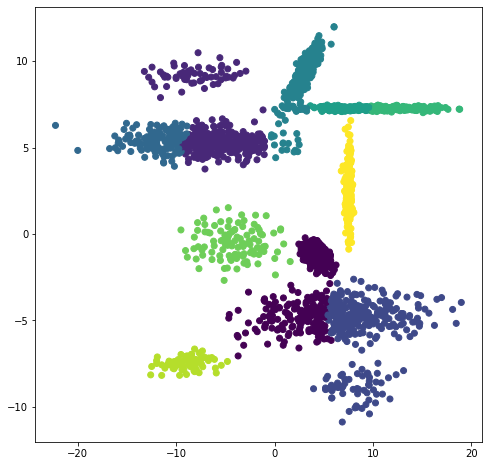

Adjusted rand index:  0.6612185249371852


In [128]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##DBSCAN

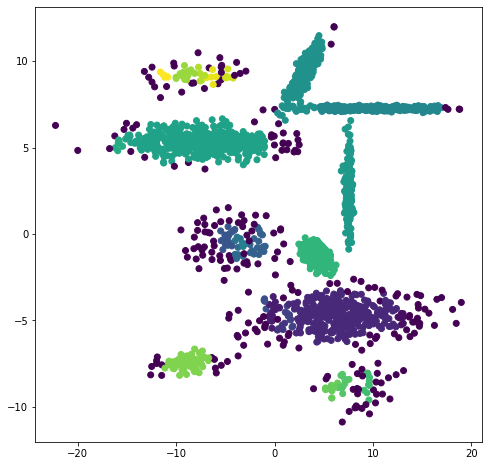

Adjusted rand index:  0.8676342236364002


In [129]:
clustering = DBSCAN().fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##KMeans

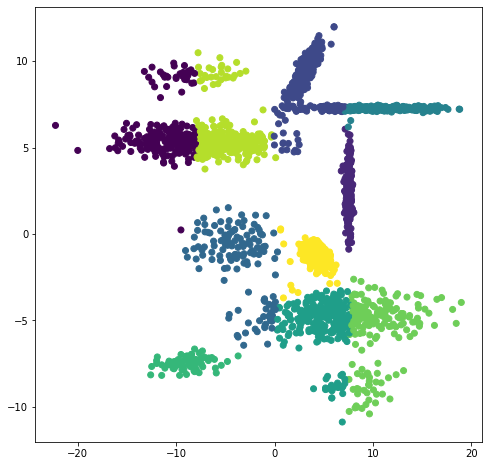

Adjusted rand index:  0.7233888412274946


In [130]:
kmeans = KMeans(n_clusters=n_components, random_state=0).fit(data_X)
predictions = kmeans.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Kernelized KMeans

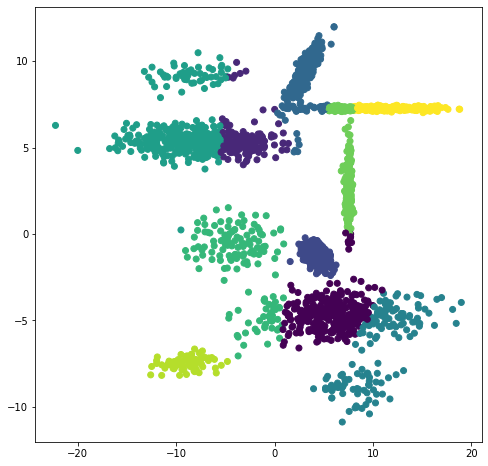

Adjusted rand index:  0.7400286999283969


In [132]:
kkmeans = kkMeans(k = n_components, gamma=0.21).fit_predict(data_X)
predictions = kkmeans.clusters

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Expectation-Maximization (EM) clustering

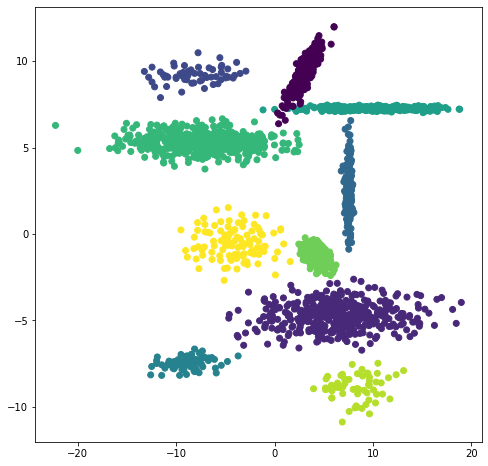

Adjusted rand index:  0.9982089084808446


In [133]:
gm = GaussianMixture(n_components=n_components, random_state=0).fit(data_X)
predictions = gm.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Self - organizing maps (SOM)

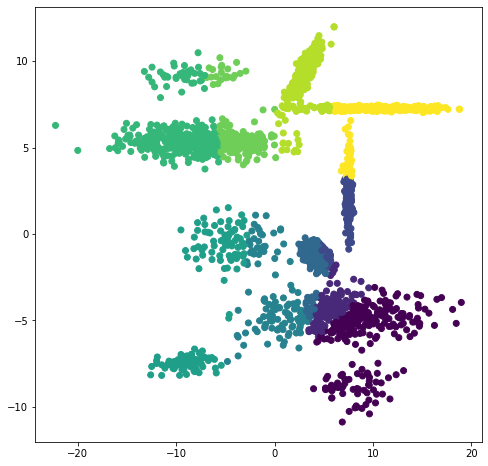

Adjusted rand index:  0.648995180762699


In [134]:
som = SOM(m=n_components, n=1, dim=n_dimensions)
som.fit(data_X)
predictions = som.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

For this dataset EM produces the best result with a 99% score for the adjusted rand index

The Average Linkage, DBSCAN, Kernelized KMeans and EM algorithms classified the data more closely to the true labels, with EM being the best among them.

#Dataset iris

In [155]:
data_X = data_iris_X
data_y = data_iris_y
n_components = 3
n_dimensions = 4

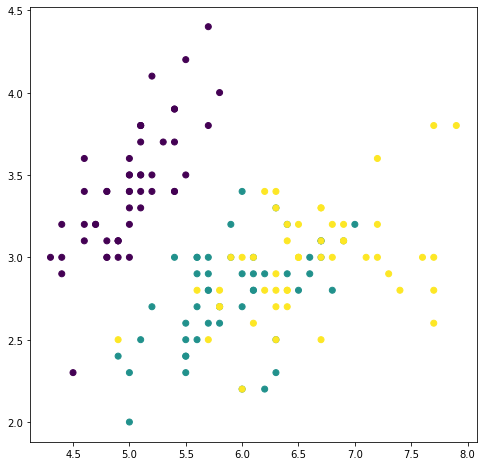

In [156]:
plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y)
plt.show()

##Single linkage

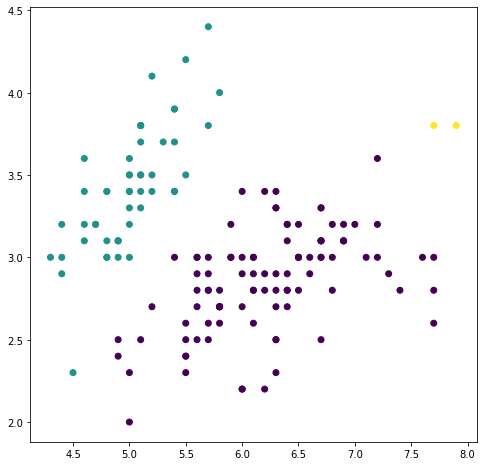

Adjusted rand index:  0.5637510205230709


In [157]:
clustering = AgglomerativeClustering(linkage='single', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Complete linkage

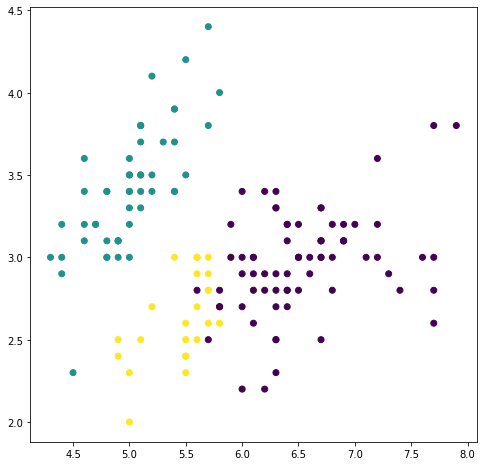

Adjusted rand index:  0.6422512518362898


In [158]:
clustering = AgglomerativeClustering(linkage='complete', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Average linkage

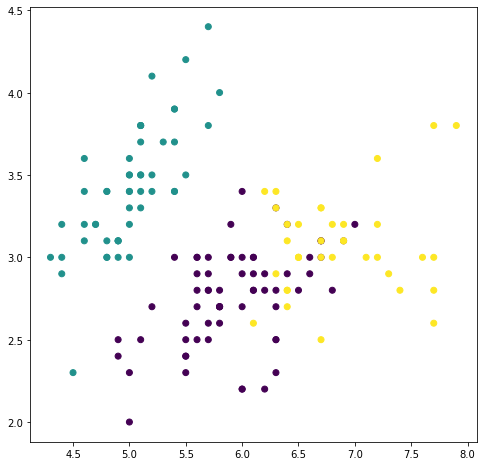

Adjusted rand index:  0.7591987071071522


In [159]:
clustering = AgglomerativeClustering(linkage='average', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Ward variance

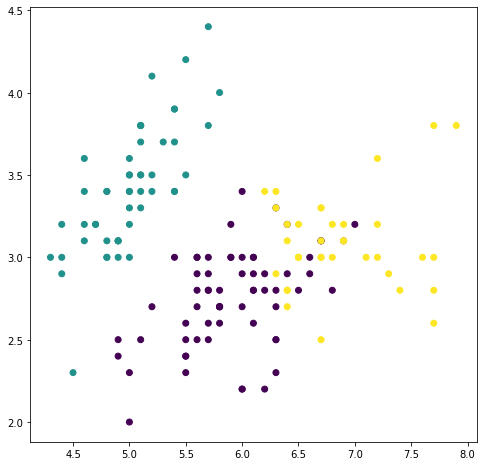

Adjusted rand index:  0.7311985567707746


In [160]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##DBSCAN

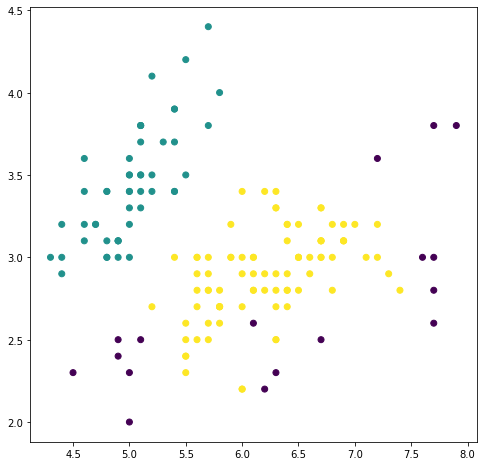

Adjusted rand index:  0.5206185241703302


In [161]:
clustering = DBSCAN().fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##KMeans

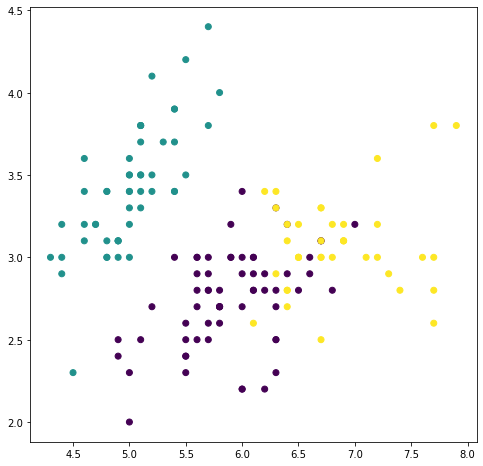

Adjusted rand index:  0.7302382722834697


In [162]:
kmeans = KMeans(n_clusters=n_components, random_state=0).fit(data_X)
predictions = kmeans.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Kernelized KMeans

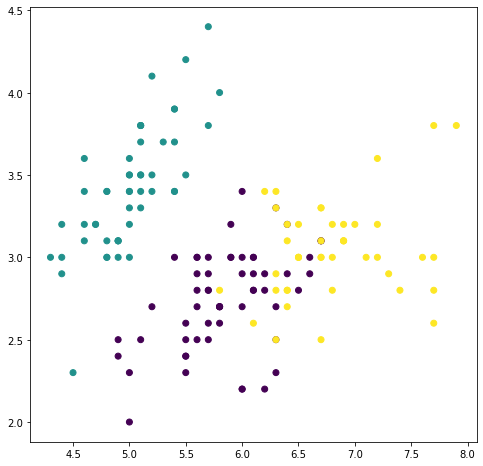

Adjusted rand index:  0.7424064303816005


In [170]:
kkmeans = kkMeans(k = n_components, gamma=0.21).fit_predict(data_X)
predictions = kkmeans.clusters

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Expectation-Maximization (EM) clustering

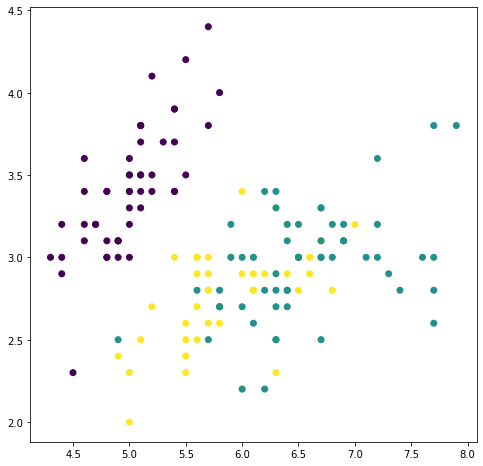

Adjusted rand index:  0.9038742317748124


In [164]:
gm = GaussianMixture(n_components=n_components, random_state=0).fit(data_X)
predictions = gm.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Self - organizing maps (SOM)

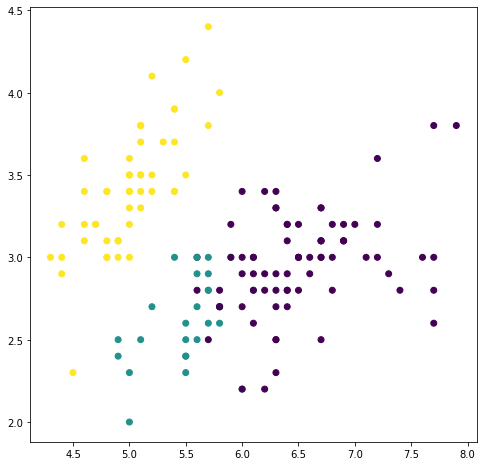

Adjusted rand index:  0.6333560373711087


In [168]:
som = SOM(m=n_components, n=1, dim=n_dimensions)
som.fit(data_X)
predictions = som.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

For this dataset EM produces the best result with a 90% score for the adjusted rand index

The Average Linkage, Ward variance, KMeans, Kernelized KMeans and EM algorithms classified the data more closely to the true labels, with EM being the best among them.

#Dataset long

In [171]:
data_X = data_long_X
data_y = data_long_y
n_components = 2
n_dimensions = 2

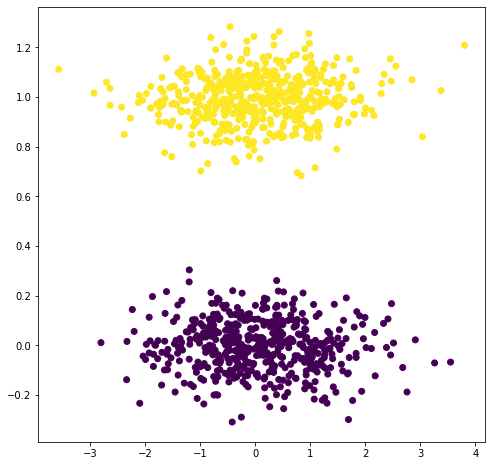

In [172]:
plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y)
plt.show()

##Single linkage

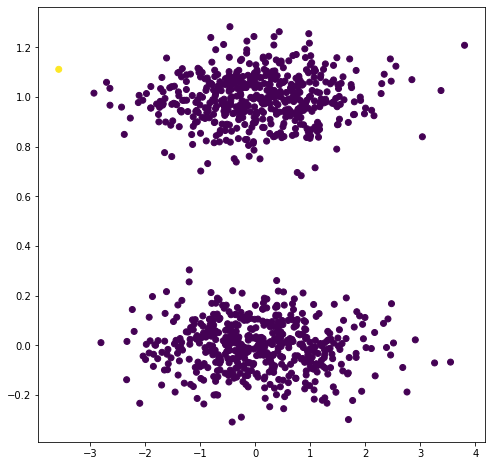

Adjusted rand index:  0.0


In [175]:
clustering = AgglomerativeClustering(linkage='single', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Complete linkage

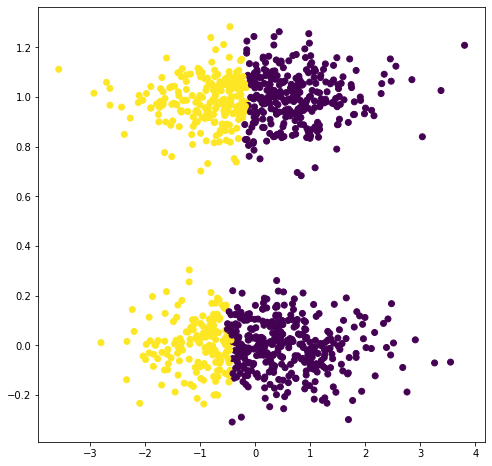

Adjusted rand index:  0.009077217789808538


In [176]:
clustering = AgglomerativeClustering(linkage='complete', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Average linkage

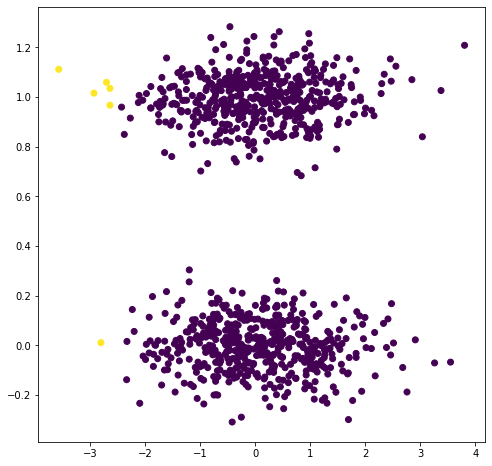

Adjusted rand index:  4.012107820664835e-05


In [178]:
clustering = AgglomerativeClustering(linkage='average', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Ward variance

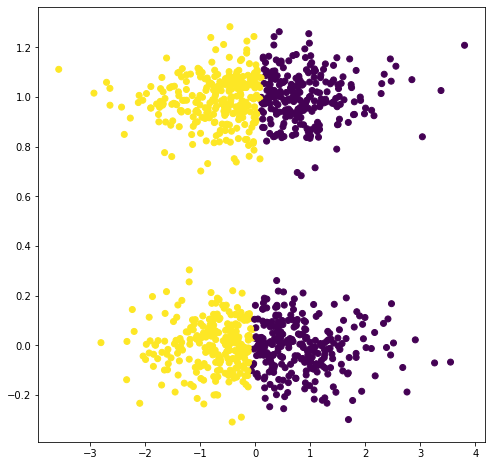

Adjusted rand index:  0.00015515831601138952


In [179]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##DBSCAN

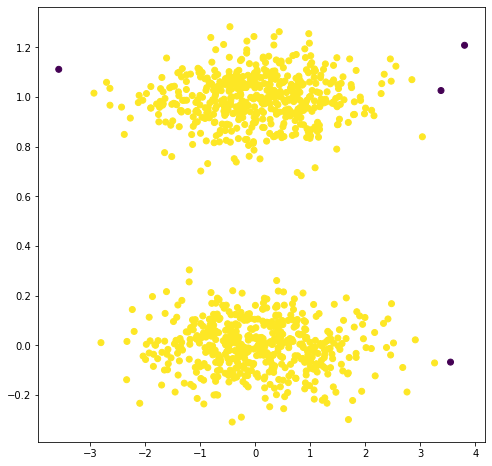

Adjusted rand index:  4.8048814520428626e-08


In [181]:
clustering = DBSCAN().fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##KMeans

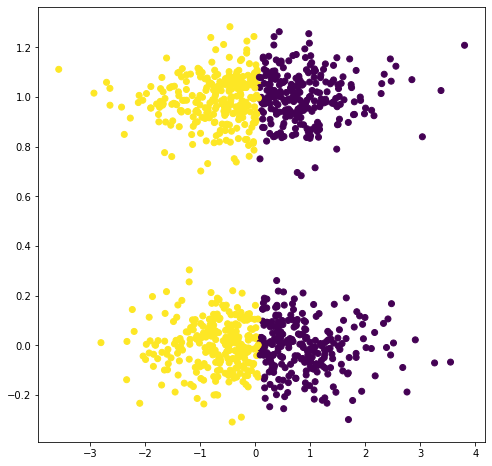

Adjusted rand index:  -0.0008049050857569367


In [184]:
kmeans = KMeans(n_clusters=n_components, random_state=0).fit(data_X)
predictions = kmeans.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Kernelized KMeans

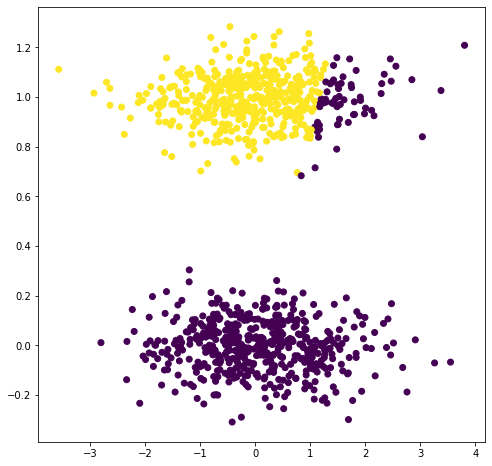

Adjusted rand index:  0.7636431627266017


In [189]:
kkmeans = kkMeans(k = n_components, gamma=0.21).fit_predict(data_X)
predictions = kkmeans.clusters

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Expectation-Maximization (EM) clustering

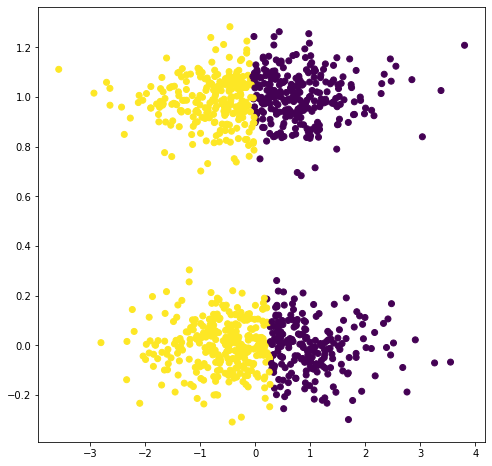

Adjusted rand index:  0.015401964481891649


In [192]:
gm = GaussianMixture(n_components=n_components, random_state=0).fit(data_X)
predictions = gm.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Self - organizing maps (SOM)

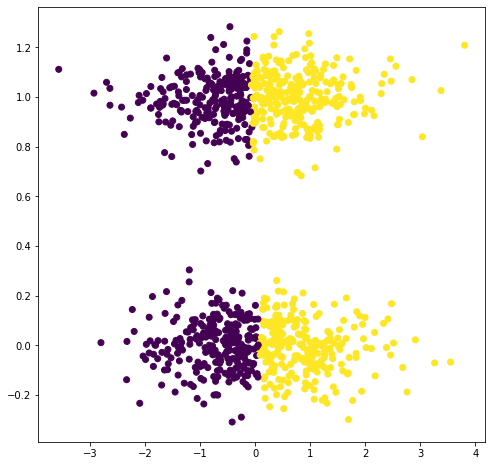

Adjusted rand index:  0.0039038040947658465


In [194]:
som = SOM(m=n_components, n=1, dim=n_dimensions)
som.fit(data_X)
predictions = som.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

For this dataset Kernelized KMeans produces the best result with a 76% score for the adjusted rand index

All the algorithms performed poorly, drawing a decision line through the middle or classifying all the points to the same class, except Kernelized KMeans which almost managed to classify all the points correctly.

#Dataset order2-3clust

In [195]:
data_X = data_order2_3clust_X
data_y = data_order2_3clust_y
n_components = 3
n_dimensions = 2

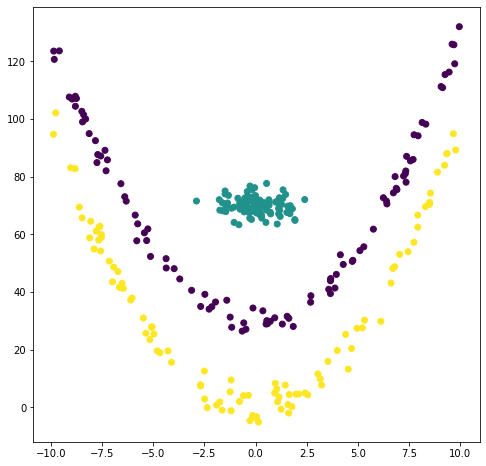

In [196]:
plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y)
plt.show()

##Single linkage

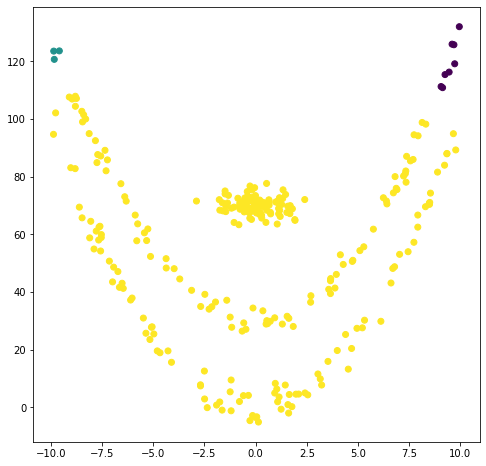

Adjusted rand index:  0.0039784897860948775


In [198]:
clustering = AgglomerativeClustering(linkage='single', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Complete linkage

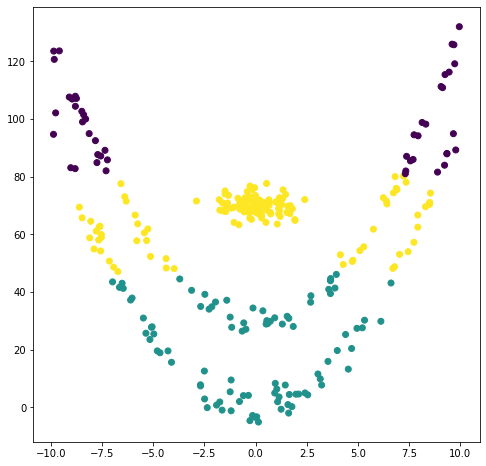

Adjusted rand index:  0.2924572720298255


In [199]:
clustering = AgglomerativeClustering(linkage='complete', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Average linkage

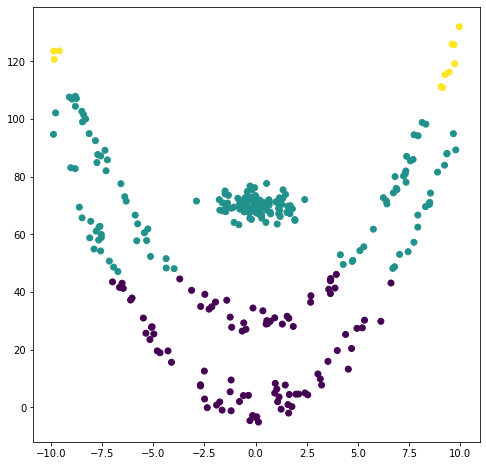

Adjusted rand index:  0.179046159897769


In [200]:
clustering = AgglomerativeClustering(linkage='average', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Ward variance

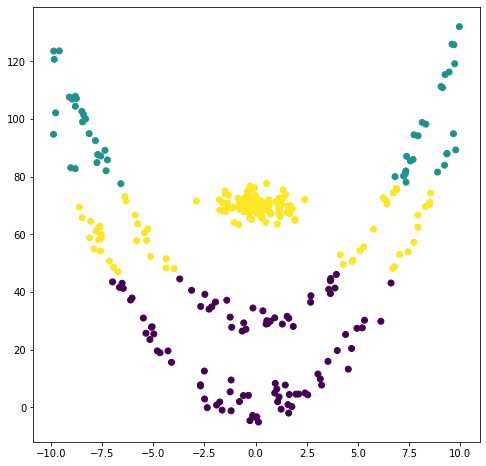

Adjusted rand index:  0.31276042541209537


In [201]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##DBSCAN

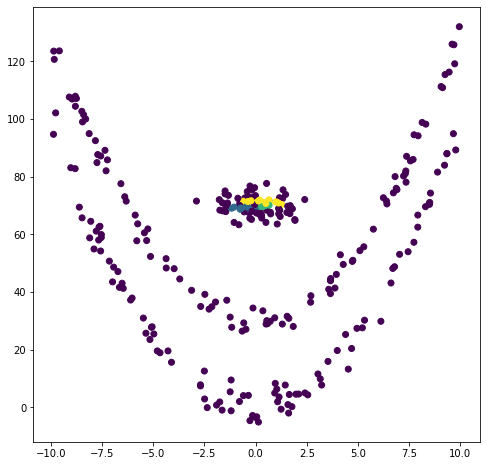

Adjusted rand index:  0.053625697191031295


In [202]:
clustering = DBSCAN().fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##KMeans

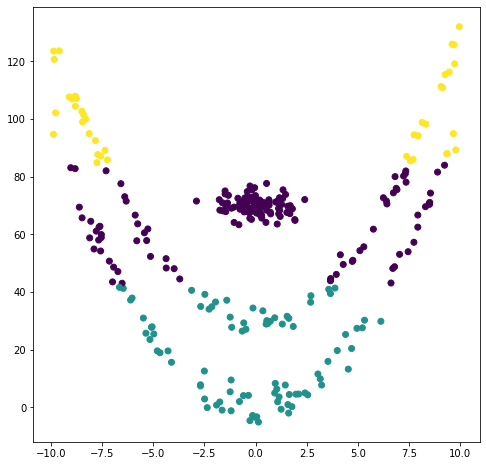

Adjusted rand index:  0.242236578994119


In [203]:
kmeans = KMeans(n_clusters=n_components, random_state=0).fit(data_X)
predictions = kmeans.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Kernelized KMeans

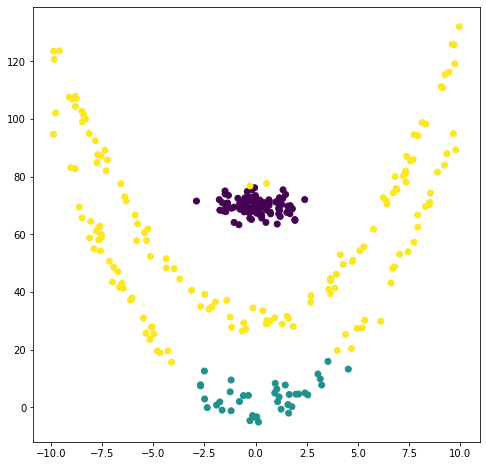

Adjusted rand index:  0.574925650390208


In [212]:
kkmeans = kkMeans(k = n_components, gamma=0.21).fit_predict(data_X)
predictions = kkmeans.clusters

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Expectation-Maximization (EM) clustering

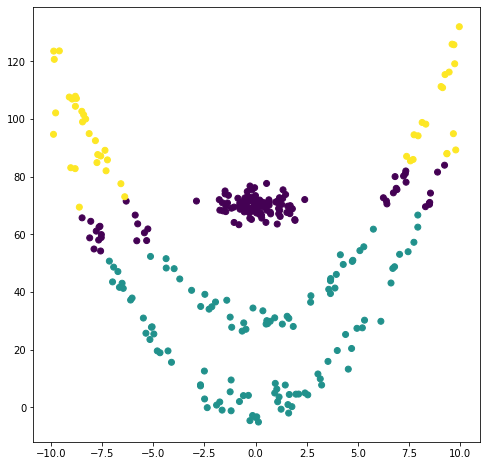

Adjusted rand index:  0.3808820562888344


In [214]:
gm = GaussianMixture(n_components=n_components, random_state=0).fit(data_X)
predictions = gm.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Self - organizing maps (SOM)

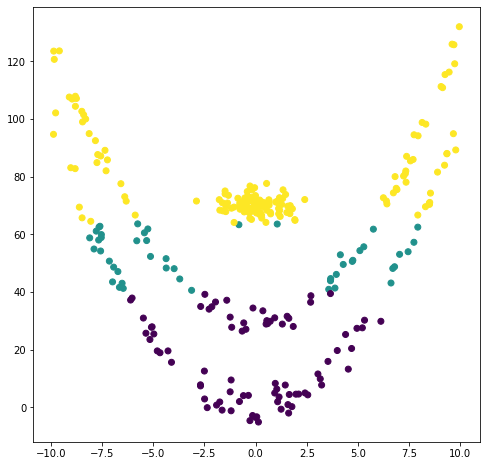

Adjusted rand index:  0.23857271281377498


In [222]:
som = SOM(m=n_components, n=1, dim=n_dimensions)
som.fit(data_X)
predictions = som.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

For this dataset Kernelized KMeans produces the best result with a 57% score for the adjusted rand index

All the algorithms performed quite poorly, with Ward variance, Kernelized KMeans and EM classifying the data more closely to the true labels.

#Dataset smile

In [223]:
data_X = data_smile_X
data_y = data_smile_y
n_components = 4
n_dimensions = 2

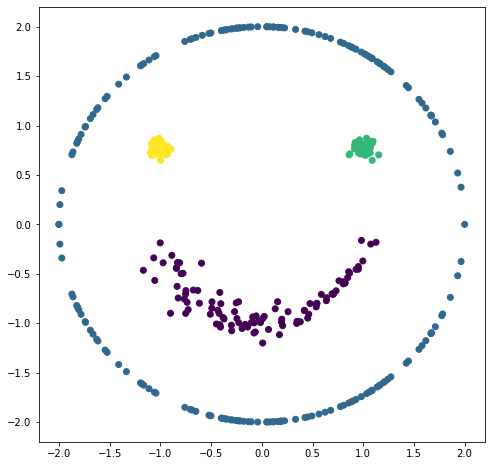

In [224]:
plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y)
plt.show()

##Single linkage

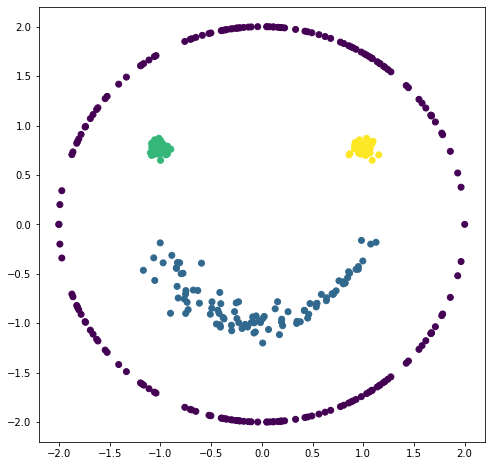

Adjusted rand index:  1.0


In [266]:
clustering = AgglomerativeClustering(linkage='single', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Complete linkage

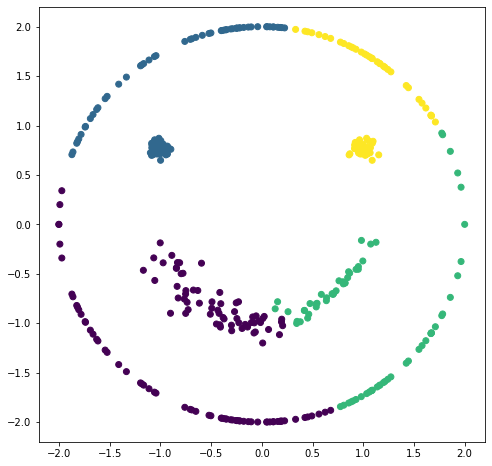

Adjusted rand index:  0.19059329705918038


In [226]:
clustering = AgglomerativeClustering(linkage='complete', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Average linkage

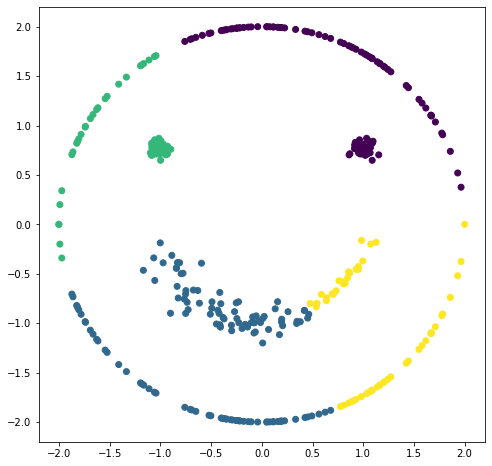

Adjusted rand index:  0.21477856942634743


In [227]:
clustering = AgglomerativeClustering(linkage='average', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Ward variance

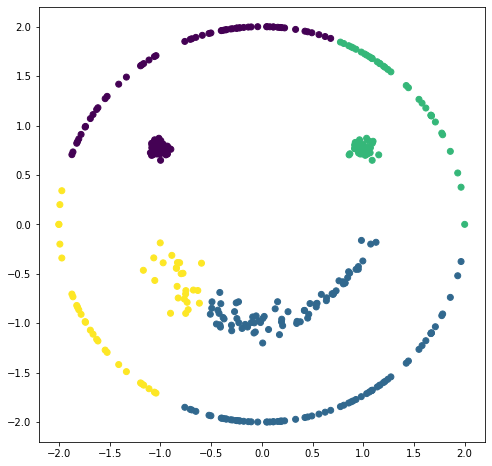

Adjusted rand index:  0.20414654709894994


In [228]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##DBSCAN

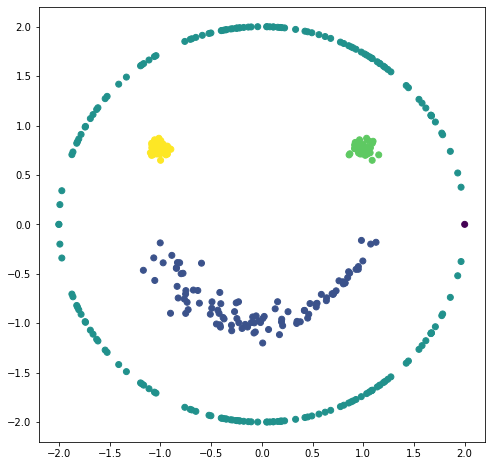

Adjusted rand index:  0.994450364447106


In [229]:
clustering = DBSCAN().fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##KMeans

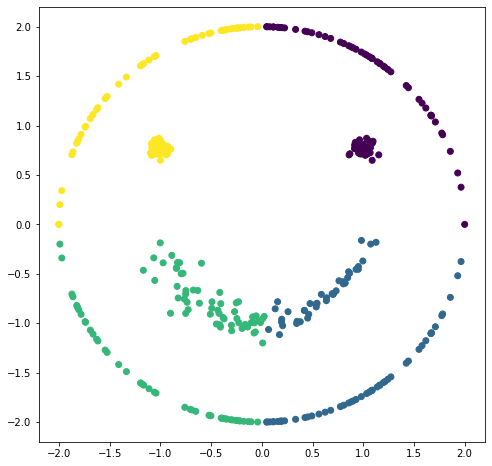

Adjusted rand index:  0.1851848367390459


In [230]:
kmeans = KMeans(n_clusters=n_components, random_state=0).fit(data_X)
predictions = kmeans.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Kernelized KMeans

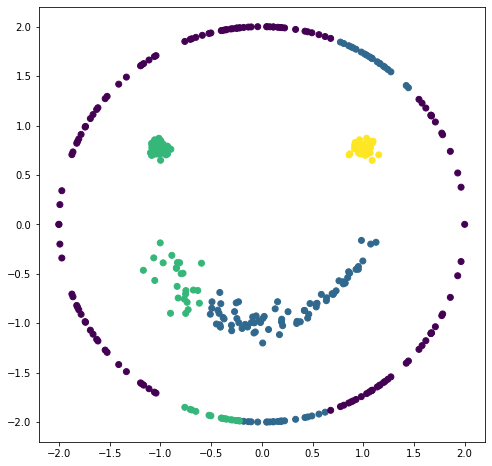

Adjusted rand index:  0.5049701697603438


In [257]:
kkmeans = kkMeans(k = n_components, gamma=3).fit_predict(data_X)
predictions = kkmeans.clusters

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Expectation-Maximization (EM) clustering

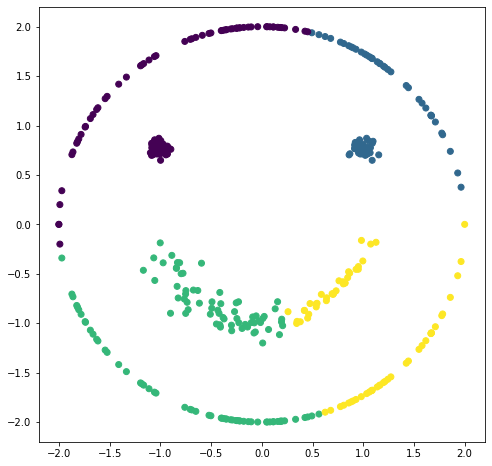

Adjusted rand index:  0.19229022827641973


In [259]:
gm = GaussianMixture(n_components=n_components, random_state=0).fit(data_X)
predictions = gm.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Self - organizing maps (SOM)

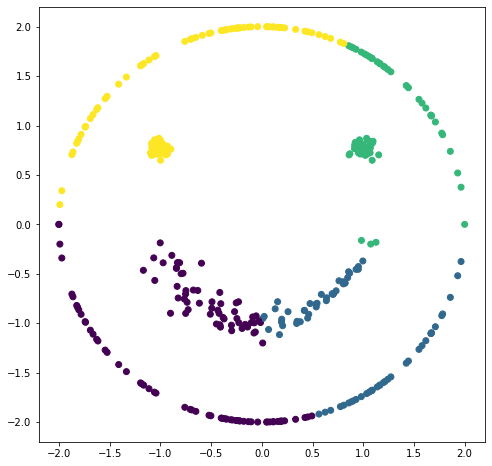

Adjusted rand index:  0.18649951212821209


In [261]:
som = SOM(m=n_components, n=1, dim=n_dimensions)
som.fit(data_X)
predictions = som.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

For this dataset Single Linkage produces the best result with a 100% score for the adjusted rand index.

The Single Linkage algorithm managed to correctly classify every point, with DBSCAN closely behind failing to classify only one point. The rest of the algorithms had bad results, with the exception of Kernelized KMeans which managed to achieve a 50% score for the adjusted rand index.

#Dataset square

In [267]:
data_X = data_square_X
data_y = data_square_y
n_components = 4
n_dimensions = 2

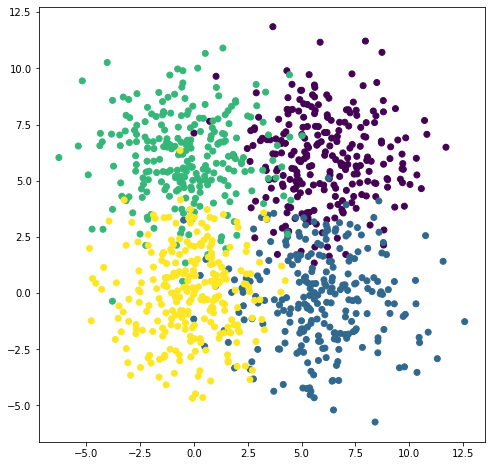

In [269]:
plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y)
plt.show()

##Single linkage

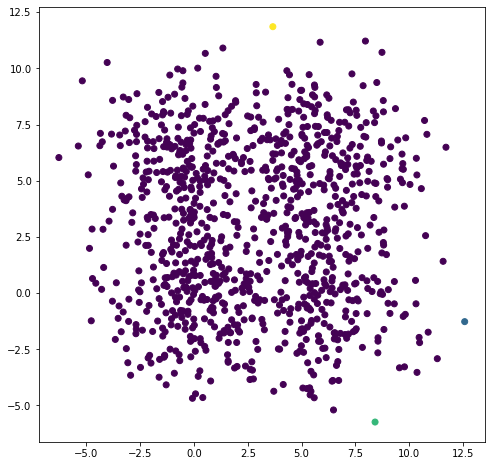

Adjusted rand index:  1.3507537471235578e-06


In [271]:
clustering = AgglomerativeClustering(linkage='single', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Complete linkage

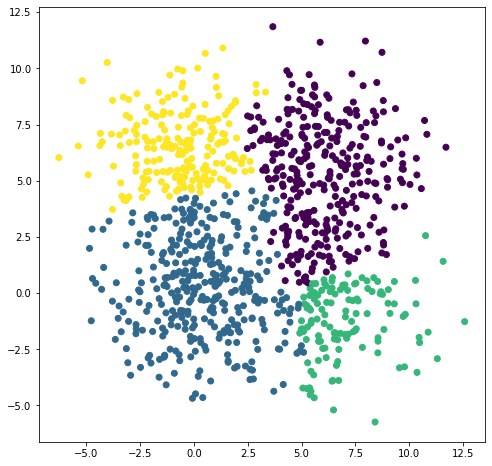

Adjusted rand index:  0.5504838884994412


In [272]:
clustering = AgglomerativeClustering(linkage='complete', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Average linkage

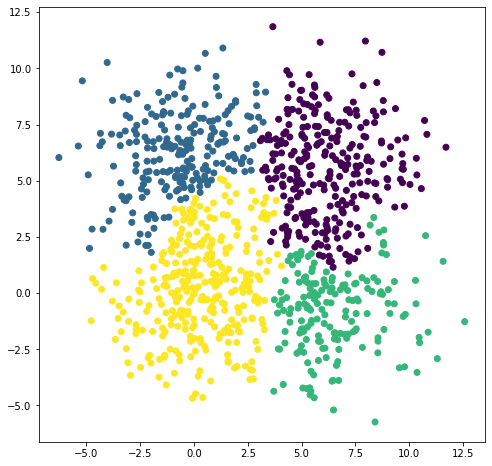

Adjusted rand index:  0.6037435609973467


In [273]:
clustering = AgglomerativeClustering(linkage='average', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Ward variance

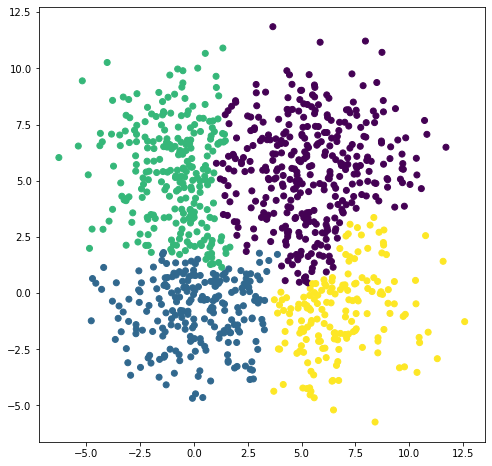

Adjusted rand index:  0.5231640584012696


In [274]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_components).fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##DBSCAN

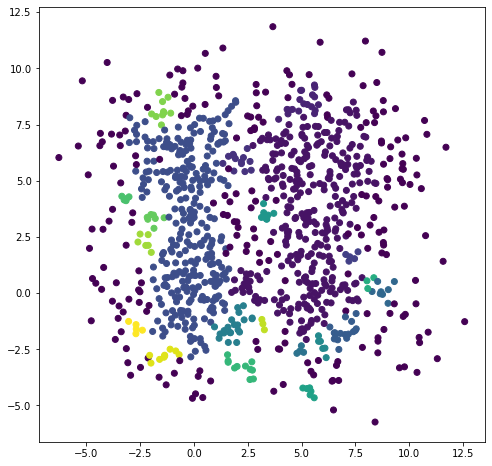

Adjusted rand index:  0.2042399389303871


In [276]:
clustering = DBSCAN().fit(data_X)
predictions = clustering.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##KMeans

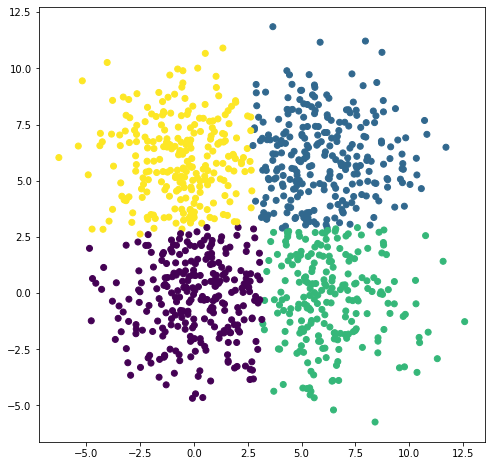

Adjusted rand index:  0.6931800370598739


In [277]:
kmeans = KMeans(n_clusters=n_components, random_state=0).fit(data_X)
predictions = kmeans.labels_

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Kernelized KMeans

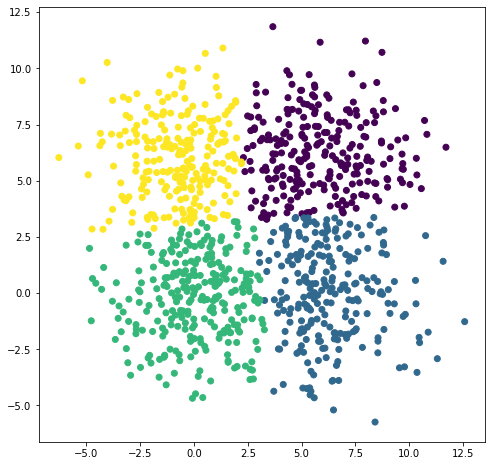

Adjusted rand index:  0.6857520511869777


In [287]:
kkmeans = kkMeans(k = n_components, gamma=0.1).fit_predict(data_X)
predictions = kkmeans.clusters

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Expectation-Maximization (EM) clustering

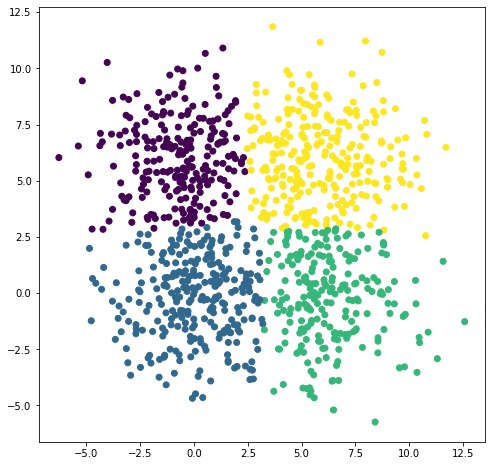

Adjusted rand index:  0.6843772646953642


In [288]:
gm = GaussianMixture(n_components=n_components, random_state=0).fit(data_X)
predictions = gm.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

##Self - organizing maps (SOM)

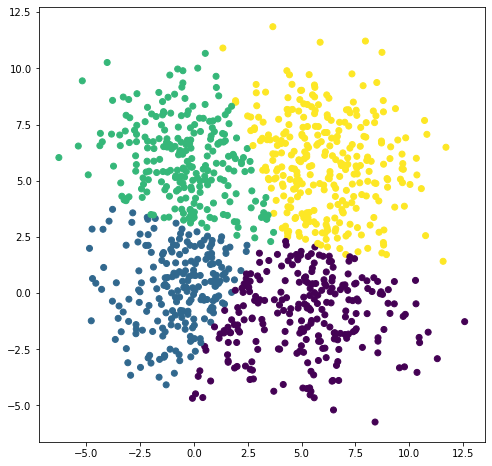

Adjusted rand index:  0.5940321731081832


In [289]:
som = SOM(m=n_components, n=1, dim=n_dimensions)
som.fit(data_X)
predictions = som.predict(data_X)

plt.figure(figsize=(8, 8))
plt.scatter(data_X[:, 0], data_X[:, 1], c=predictions)
plt.show()

print("Adjusted rand index: ", adjusted_rand_score(data_y, predictions))

For this dataset KMeans produces the best result with a 69% score for the adjusted rand index.

The Kernelized KMeans and EM algorithms also managed to get a 68% score for the adjusted rand index. The dataset contains a lot of noise which makes it hard for the algorithms to identify clusters, especially for those where we have to specify the number of clusters beforehand.